In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# read San Francisco Crime csv
sf_df = pd.read_csv("../San_Fran_Cleaned_Data.csv")
sf_df.head()

,Unnamed: 0,Category,Descript,Date,DayOfWeek
0,0,VEHICLE THEFT,STOLEN MOTORCYCLE,05/15/2018,Tuesday
1,1,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",05/15/2018,Tuesday
2,2,OTHER OFFENSES,PAROLE VIOLATION,05/15/2018,Tuesday
3,3,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,05/15/2018,Tuesday
4,4,OTHER OFFENSES,TRAFFIC VIOLATION,05/15/2018,Tuesday


In [4]:
sf_df.count()

Unnamed: 0    2215024
Category      2215024
Descript      2215024
Date          2215024
DayOfWeek     2215024
dtype: int64

In [4]:
# Converting Time to Date
sf_df['Date'] = pd.to_datetime(sf_df['Date'])

In [3]:
# Combining types of crimes
sf_df = sf_df.replace({"DISORDERLY CONDUCT": "Drunk/Disorderly", "DRUNKENNESS": "Drunk/Disorderly", "VANDALISM": "Drunk/Disorderly",\
                      "LARCENY/THEFT": "Theft", "STOLEN PROPERTY": "Theft"})
sf_df.head()

,Unnamed: 0,Category,Descript,Date,DayOfWeek
0,0,VEHICLE THEFT,STOLEN MOTORCYCLE,05/15/2018,Tuesday
1,1,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",05/15/2018,Tuesday
2,2,OTHER OFFENSES,PAROLE VIOLATION,05/15/2018,Tuesday
3,3,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,05/15/2018,Tuesday
4,4,OTHER OFFENSES,TRAFFIC VIOLATION,05/15/2018,Tuesday


In [6]:
# Passing Categories to be analyzed into a series
sf_df_filtered = sf_df[sf_df.Category.isin(['Theft', 'VEHICLE THEFT', 'ASSAULT', 'Drunk/Disorderly', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC',\
                          'PROSTITUTION'])]

sf_df_filtered.head()

,Unnamed: 0,Category,Descript,Date,DayOfWeek
0,0,VEHICLE THEFT,STOLEN MOTORCYCLE,2018-05-15,Tuesday
7,7,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,2018-05-15,Tuesday
10,10,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,2018-05-14,Monday
13,13,ASSAULT,BATTERY,2018-05-14,Monday
14,14,Theft,GRAND THEFT FROM LOCKED AUTO,2018-05-14,Monday


In [7]:
sf_df_filtered.count()

Unnamed: 0    1091561
Category      1091561
Descript      1091561
Date          1091561
DayOfWeek     1091561
dtype: int64

In [8]:
#filtering out all data before January 1, 2015
sf_df_date_filter = sf_df_filtered[sf_df_filtered['Date']>="01/01/2015"]
sf_df_date_filter.tail()

,Unnamed: 0,Category,Descript,Date,DayOfWeek
508834,508834,Theft,GRAND THEFT OF PROPERTY,2015-01-01,Thursday
508835,508835,Theft,GRAND THEFT FROM UNLOCKED AUTO,2015-01-01,Thursday
508836,508836,Theft,GRAND THEFT FROM LOCKED AUTO,2015-01-01,Thursday
508845,508845,Theft,GRAND THEFT PURSESNATCH,2015-01-01,Thursday
508847,508847,VEHICLE THEFT,STOLEN AUTOMOBILE,2015-01-01,Thursday


In [9]:
#filtering out all data after February 28, 2017
sf_df_enddate = sf_df_date_filter[sf_df_date_filter['Date']<="02/28/2017"]
sf_df_enddate.tail()

,Unnamed: 0,Category,Descript,Date,DayOfWeek
508834,508834,Theft,GRAND THEFT OF PROPERTY,2015-01-01,Thursday
508835,508835,Theft,GRAND THEFT FROM UNLOCKED AUTO,2015-01-01,Thursday
508836,508836,Theft,GRAND THEFT FROM LOCKED AUTO,2015-01-01,Thursday
508845,508845,Theft,GRAND THEFT PURSESNATCH,2015-01-01,Thursday
508847,508847,VEHICLE THEFT,STOLEN AUTOMOBILE,2015-01-01,Thursday


In [10]:
#Filtering out dates (only Jan-Feb 2015 will remain)

sf_df_2015 = sf_df_date_filter[sf_df_date_filter['Date']<="03/01/2015"]
sf_df_2015.head()

,Unnamed: 0,Category,Descript,Date,DayOfWeek
482441,482441,Drunk/Disorderly,"MALICIOUS MISCHIEF, VANDALISM",2015-03-01,Sunday
482442,482442,ASSAULT,BATTERY,2015-03-01,Sunday
482446,482446,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,2015-03-01,Sunday
482447,482447,ASSAULT,BATTERY WITH SERIOUS INJURIES,2015-03-01,Sunday
482449,482449,Theft,GRAND THEFT FROM PERSON,2015-03-01,Sunday


In [11]:
#Getting Data Points to graph
sf_df_go = sf_df_filtered[sf_df_filtered['Date']=="02/26/2017"]
sf_df_go['Category'].value_counts()

Theft                          99
ASSAULT                        54
Drunk/Disorderly               29
DRUG/NARCOTIC                  15
VEHICLE THEFT                  13
DRIVING UNDER THE INFLUENCE     1
Name: Category, dtype: int64

In [12]:
# Plot Graph for January-February 2015
# Create lists for 2015 graph

x_axis = range(1, 10)
theft_incidents = [239, 208, 281, 230, 226, 214, 214, 272, 244] 
assault_number = [67, 83, 88, 64, 93, 70, 84, 90, 81]
drunk_disorder = [35, 46, 44, 51, 59, 41, 46, 36, 63]
vehicle_theft_incidents = [26, 39, 38, 50, 40, 29, 37, 43, 36]
drug_narc = [21, 21, 30, 11, 16, 18, 8, 22, 37]
dui_number = [4, 2, 4, 2, 3, 0, 4, 4, 2]
prost_number = [0, 0, 1, 0, 1, 0, 0, 1, 1]
    

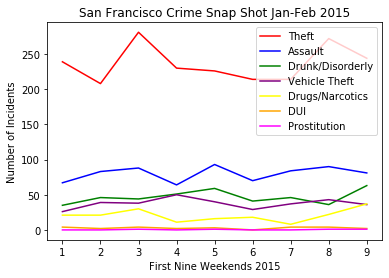

In [13]:
#Plot graph for 2015 and apply styling

theft, = plt.plot(x_axis, theft_incidents, color="red", label="Theft")
assault, = plt.plot(x_axis, assault_number, color="blue", label="Assault")
drunk_disorderly, = plt.plot(x_axis, drunk_disorder, color="green", label="Drunk/Disorderly")
vehicle_theft, = plt.plot(x_axis, vehicle_theft_incidents, color="purple", label="Vehicle Theft")
drug_narcotics, = plt.plot(x_axis, drug_narc, color="yellow", label="Drugs/Narcotics")
driving_influence, = plt.plot(x_axis, dui_number, color="orange", label="DUI")
prostitution, = plt.plot(x_axis, prost_number, color="magenta", label="Prostitution")

#Add labels to graph
plt.title("San Francisco Crime Snap Shot Jan-Feb 2015")
plt.xlabel("First Nine Weekends 2015")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, assault, drunk_disorderly, vehicle_theft, drug_narcotics, driving_influence, prostitution], loc="best")

plt.savefig("SanFrancisco2015.png")

In [87]:
# Create Lists for 2016 (Superbowl)

x_axis = range(1, 10)
theft_incidents = [191, 216, 260, 251, 213, 270, 225, 240, 229] 
assault_number = [60, 66, 72, 85, 86, 100, 93, 71, 100]
drunk_disorder = [43, 62, 58, 50, 53, 75, 43, 57, 36]
vehicle_theft_incidents = [35, 30, 40, 27, 32, 40, 32, 49, 38]
drug_narc = [27, 25, 10, 23, 16, 15, 20, 28, 25]
dui_number = [2, 1, 1, 2, 4, 0, 8, 3, 1]
prost_number = [0, 1, 0, 28, 8, 5, 0, 1, 0]

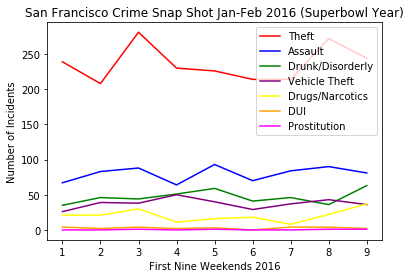

In [14]:
# Graph for San Francisco 2016 (Superbowl Year)

theft, = plt.plot(x_axis, theft_incidents, color="red", label="Theft")
assault, = plt.plot(x_axis, assault_number, color="blue", label="Assault")
drunk_disorderly, = plt.plot(x_axis, drunk_disorder, color="green", label="Drunk/Disorderly")
vehicle_theft, = plt.plot(x_axis, vehicle_theft_incidents, color="purple", label="Vehicle Theft")
drug_narcotics, = plt.plot(x_axis, drug_narc, color="yellow", label="Drugs/Narcotics")
driving_influence, = plt.plot(x_axis, dui_number, color="orange", label="DUI")
prostitution, = plt.plot(x_axis, prost_number, color="magenta", label="Prostitution")

#Add labels to graph
plt.title("San Francisco Crime Snap Shot Jan-Feb 2016 (Superbowl Year)")
plt.xlabel("First Nine Weekends 2016")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, assault, drunk_disorderly, vehicle_theft, drug_narcotics, driving_influence, prostitution], loc="best")

plt.savefig("SanFranSuperBowl2016.png")

In [89]:
# Create Lists for San Francisco 2017

x_axis = range(1, 10)
theft_incidents = [267, 254, 266, 292, 307, 242, 261, 314, 246] 
assault_number = [100, 72, 82, 72, 71, 94, 84, 68, 91]
drunk_disorder = [70, 64, 63, 83, 51, 67, 68, 73, 57]
vehicle_theft_incidents = [30, 22, 30, 36, 47, 40, 44, 45, 41]
drug_narc = [12, 16, 30, 20, 21, 16, 10, 10, 23]
dui_number = [5, 3, 2, 4, 8, 3, 1, 6, 4]
prost_number = [0, 0, 0, 0, 0, 0, 2, 0, 0]

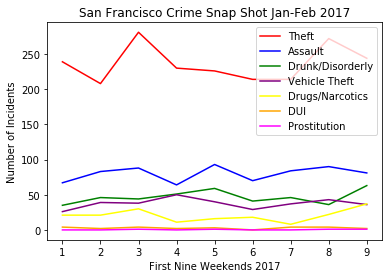

In [15]:
# Graph for San Francisco 2017

theft, = plt.plot(x_axis, theft_incidents, color="red", label="Theft")
assault, = plt.plot(x_axis, assault_number, color="blue", label="Assault")
drunk_disorderly, = plt.plot(x_axis, drunk_disorder, color="green", label="Drunk/Disorderly")
vehicle_theft, = plt.plot(x_axis, vehicle_theft_incidents, color="purple", label="Vehicle Theft")
drug_narcotics, = plt.plot(x_axis, drug_narc, color="yellow", label="Drugs/Narcotics")
driving_influence, = plt.plot(x_axis, dui_number, color="orange", label="DUI")
prostitution, = plt.plot(x_axis, prost_number, color="magenta", label="Prostitution")

#Add labels to graph
plt.title("San Francisco Crime Snap Shot Jan-Feb 2017")
plt.xlabel("First Nine Weekends 2017")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, assault, drunk_disorderly, vehicle_theft, drug_narcotics, driving_influence, prostitution], loc="best")

plt.savefig("SanFrancisco2017.png")
